C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

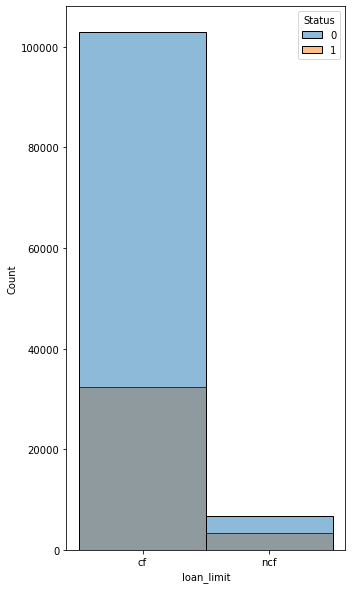

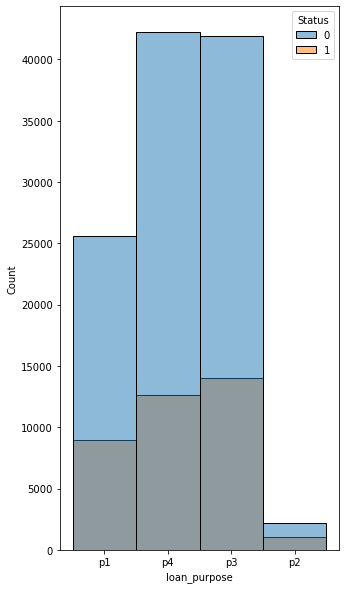

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120526 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         120526 non-null  int64  
 1   year                       120526 non-null  int64  
 2   loan_limit                 120526 non-null  object 
 3   Gender                     120526 non-null  object 
 4   approv_in_adv              120526 non-null  object 
 5   loan_type                  120526 non-null  object 
 6   loan_purpose               120526 non-null  object 
 7   Credit_Worthiness          120526 non-null  object 
 8   open_credit                120526 non-null  object 
 9   business_or_commercial     120526 non-null  object 
 10  loan_amount                120526 non-null  int64  
 11  rate_of_interest           100879 non-null  float64
 12  Interest_rate_spread       100879 non-null  float64
 13  Upfront_charges            98

In [1]:
%run Data_Cleaning.ipynb

In [2]:
clean=pd.read_csv('data/cleaned.csv',index_col=0)
X=clean.drop(columns=['Status'])
y=clean['Status']

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120526 entries, 0 to 148669
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 120526 non-null  object 
 1   approv_in_adv              120526 non-null  object 
 2   loan_type                  120526 non-null  object 
 3   loan_purpose               120526 non-null  object 
 4   Credit_Worthiness          120526 non-null  object 
 5   open_credit                120526 non-null  object 
 6   business_or_commercial     120526 non-null  object 
 7   loan_amount                120526 non-null  int64  
 8   rate_of_interest           100879 non-null  float64
 9   Interest_rate_spread       100879 non-null  float64
 10  Upfront_charges            98187 non-null   float64
 11  term                       120526 non-null  float64
 12  Neg_ammortization          120526 non-null  object 
 13  interest_only              12

<AxesSubplot:>

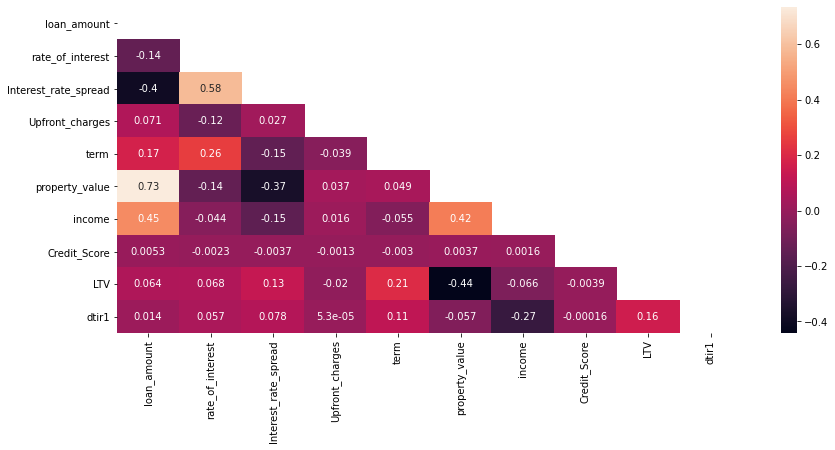

In [4]:
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
sns.heatmap(X.corr(),annot=True,mask=mask)

In [5]:
to_drop=['Interest_rate_spread','rate_of_interest','Upfront_charges'] 
# dropping columns due to limitation of data availibility, see markdown notes in Data cleaning notebook
# property value demonstrates collinearity but we decided to keep the feature since we are using,
clean=clean.drop(columns=to_drop)


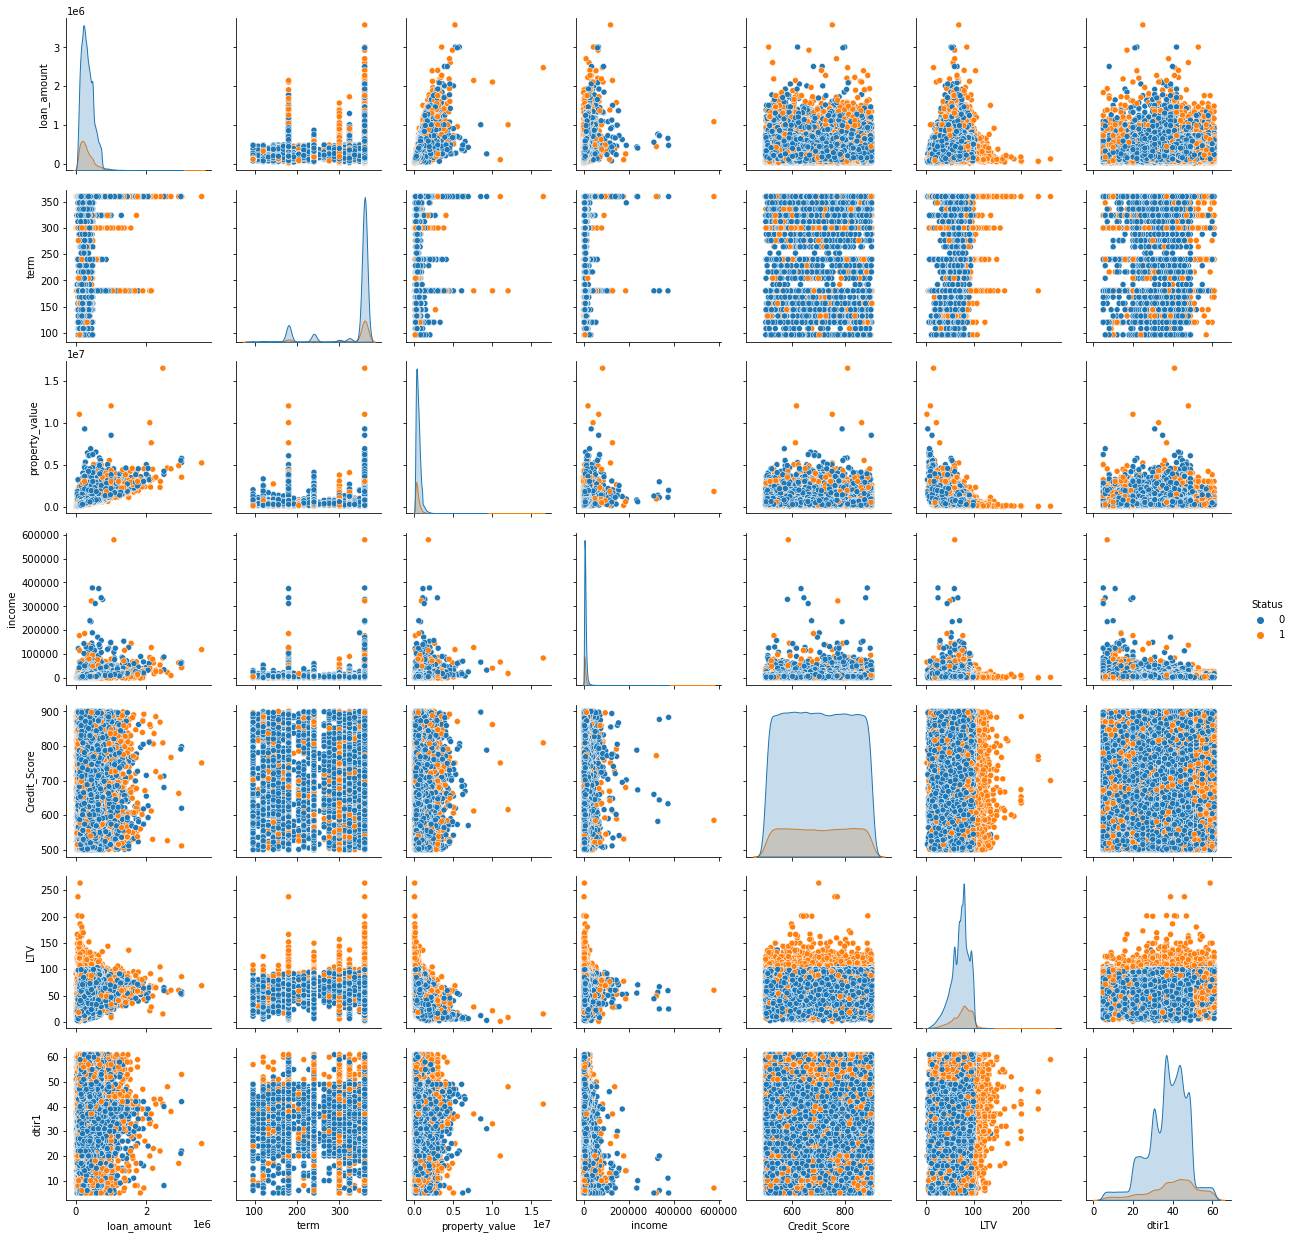

In [7]:
sns.pairplot(clean, hue = 'Status')

Text(0.5, 1.0, 'LTV x DTIR Distribution by Default Status')

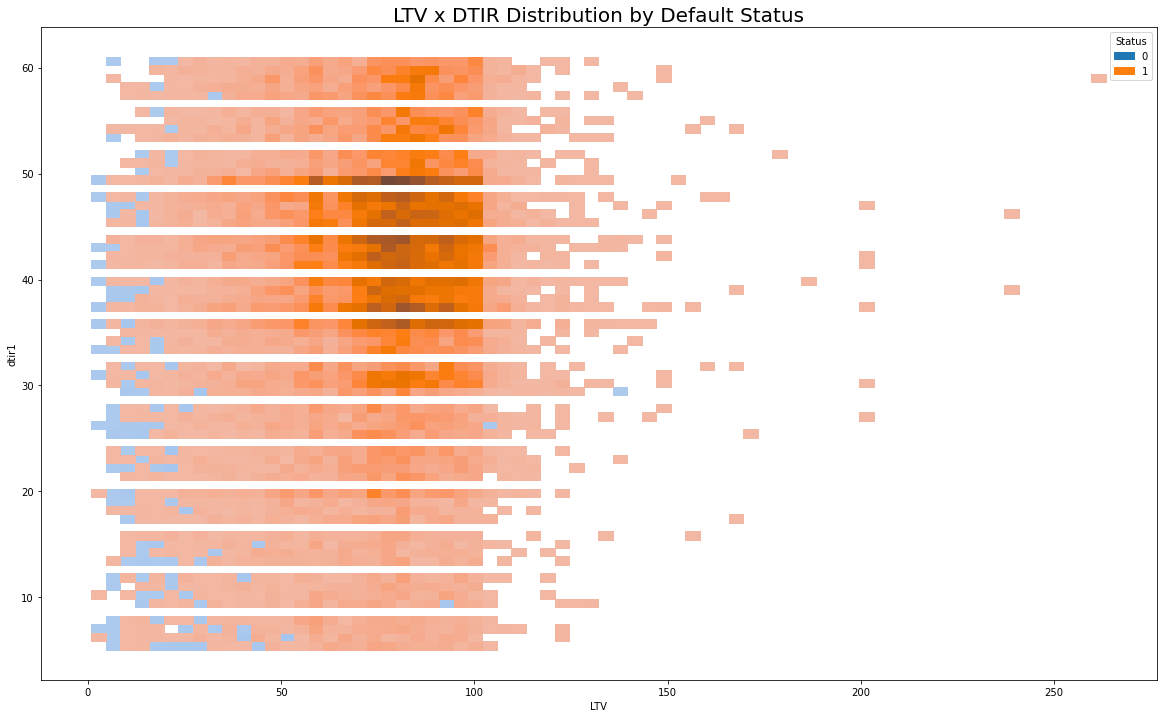

In [95]:
f,ax = plt.subplots(figsize=(20,12))
sns.histplot(x='LTV',y='dtir1',data=clean,hue='Status',ax=ax,common_norm=False,stat='probability',bins=70,element='step')
plt.title('LTV x DTIR Distribution by Default Status',fontsize=20)

Text(0.5, 1.0, 'LTV Distribution by Default Status')

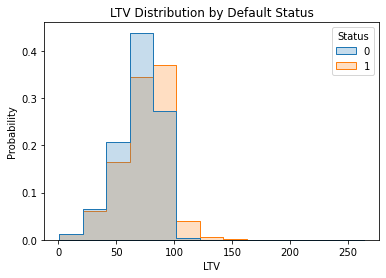

In [76]:
sns.histplot(x='LTV',data=clean,hue='Status', common_norm=False,stat='probability',element='step',bins=13)
plt.title('LTV Distribution by Default Status')

Text(0.5, 1.0, 'Income Distribution by Default Status')

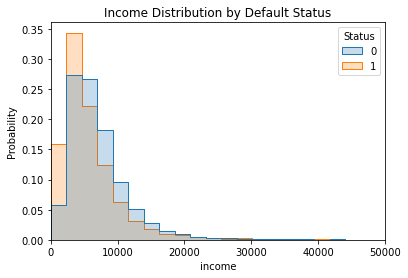

In [87]:
f,ax = plt.subplots()
sns.histplot(x='income',data=clean,hue='Status', ax=ax,common_norm=False,stat='probability',element='step',bins=250)
ax.set_xlim(xmin=0,xmax=50000)
plt.title('Income Distribution by Default Status')

Text(0.5, 1.0, 'DTIR Distribution by Default Status')

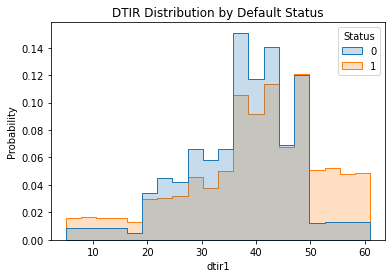

In [80]:
sns.histplot(x='dtir1',data=clean,hue='Status', common_norm=False,stat='probability',element='step',bins=20)
plt.title('DTIR Distribution by Default Status')

Text(0.5, 1.0, 'Loan Amount Distribution by Default Status')

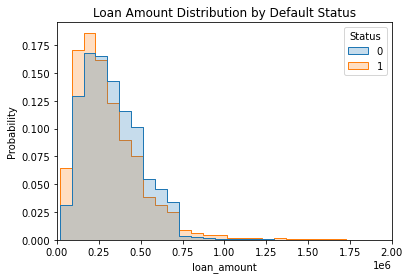

In [97]:
f,ax = plt.subplots()
sns.histplot(x='loan_amount',data=clean,hue='Status', ax=ax,common_norm=False,stat='probability',element='step',bins=50)
ax.set_xlim(xmin=0,xmax=2000000)
plt.title('Loan Amount Distribution by Default Status')

Text(0.5, 1.0, 'Income x Loan Amount Distribution by Default Status')

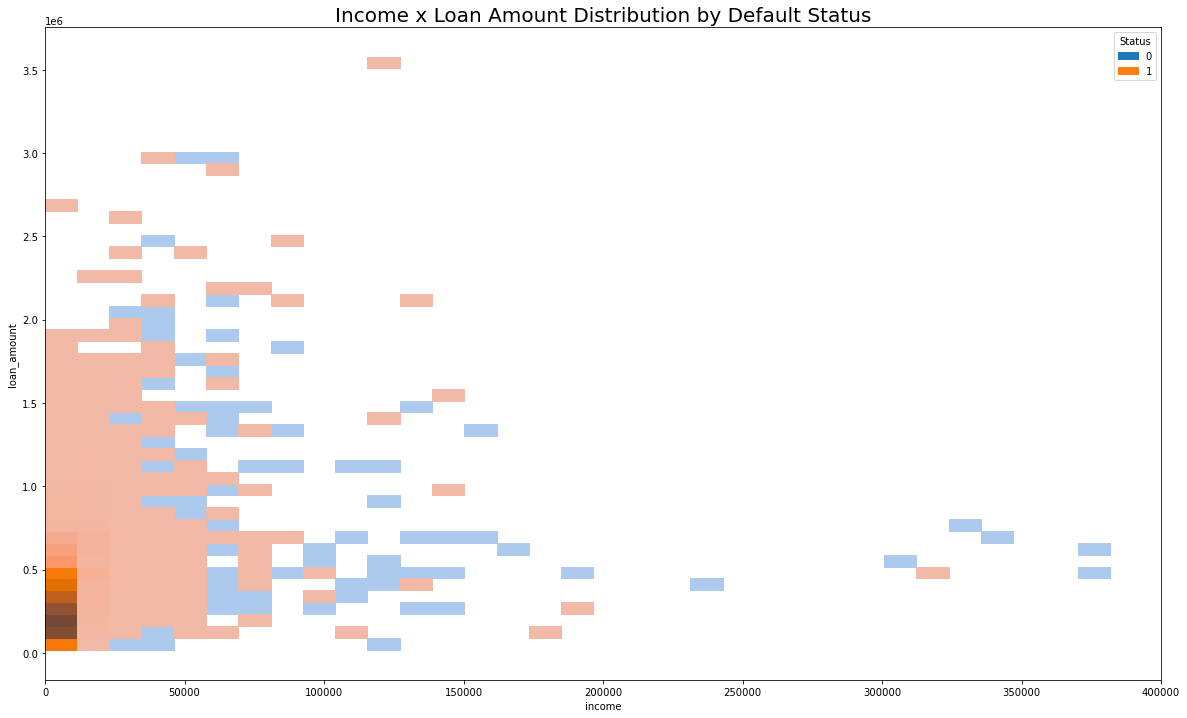

In [102]:
f,ax = plt.subplots(figsize=(20,12))
sns.histplot(x='income',y='loan_amount',data=clean,hue='Status',ax=ax,common_norm=False,stat='probability',bins=50,element='step')
ax.set_xlim(xmin=0,xmax=400000)
plt.title('Income x Loan Amount Distribution by Default Status',fontsize=20)

<AxesSubplot:xlabel='Status', ylabel='Neg_ammortization'>

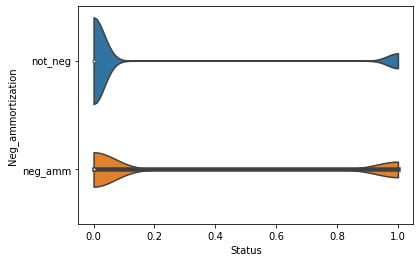

In [9]:
sns.violinplot(y='Neg_ammortization',x='Status',data=clean,cut=0)

Status  Neg_ammortization
0       not_neg              0.919448
        neg_amm              0.080552
1       not_neg              0.813101
        neg_amm              0.186899
Name: Neg_ammortization, dtype: float64

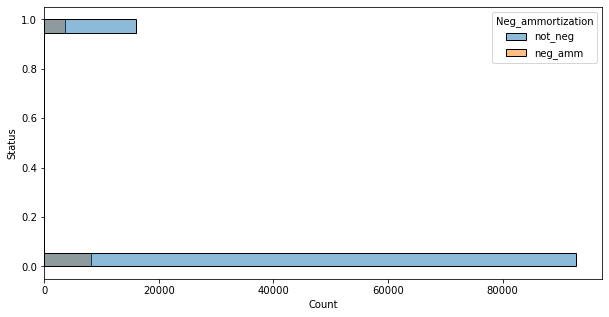

In [36]:
f,ax=plt.subplots(figsize=(10,5))
sns.histplot(y = 'Status',data = clean,hue='Neg_ammortization',ax=ax)
# include in baseline model
clean.groupby(by='Status').['Neg_ammortization'].value_counts(normalize=True)

Status  interest_only
0       not_int          0.954599
        int_only         0.045401
1       not_int          0.949407
        int_only         0.050593
Name: interest_only, dtype: float64

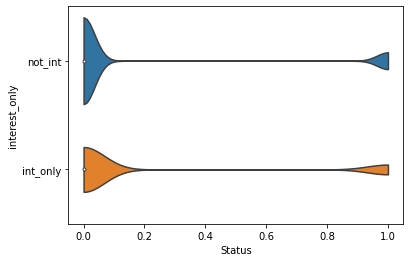

In [38]:
sns.violinplot(y='interest_only',x='Status',data=clean,cut=0)
# include in baseline model
clean.groupby(by='Status')['interest_only'].value_counts(normalize=True)

<AxesSubplot:xlabel='Count', ylabel='Status'>

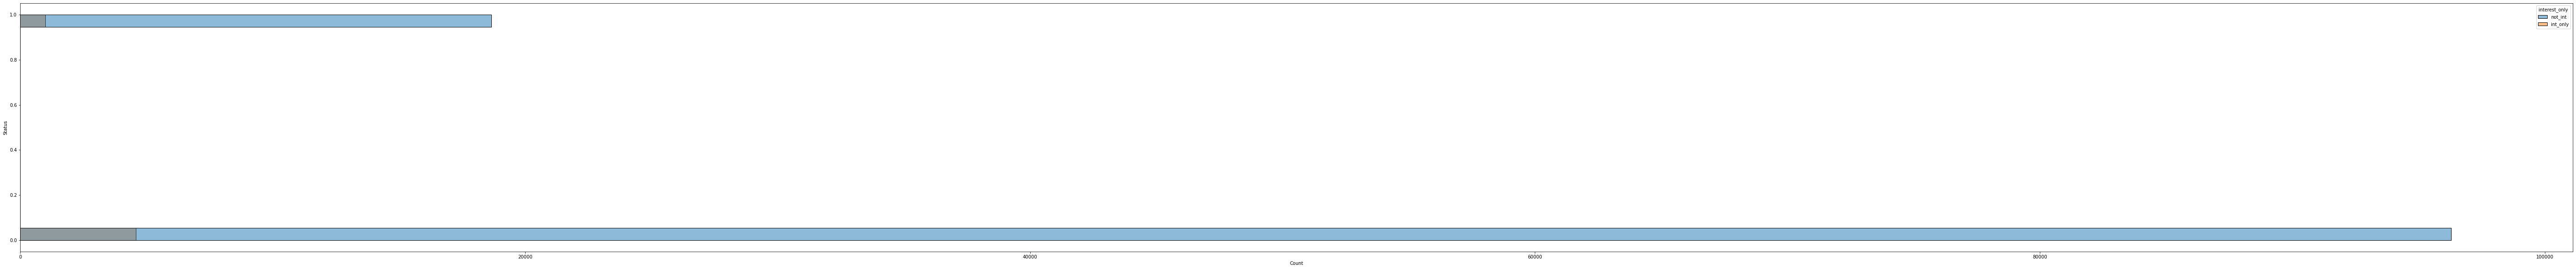

In [12]:
f,ax=plt.subplots(figsize=(100,10))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='interest_only')

<AxesSubplot:xlabel='Count', ylabel='Status'>

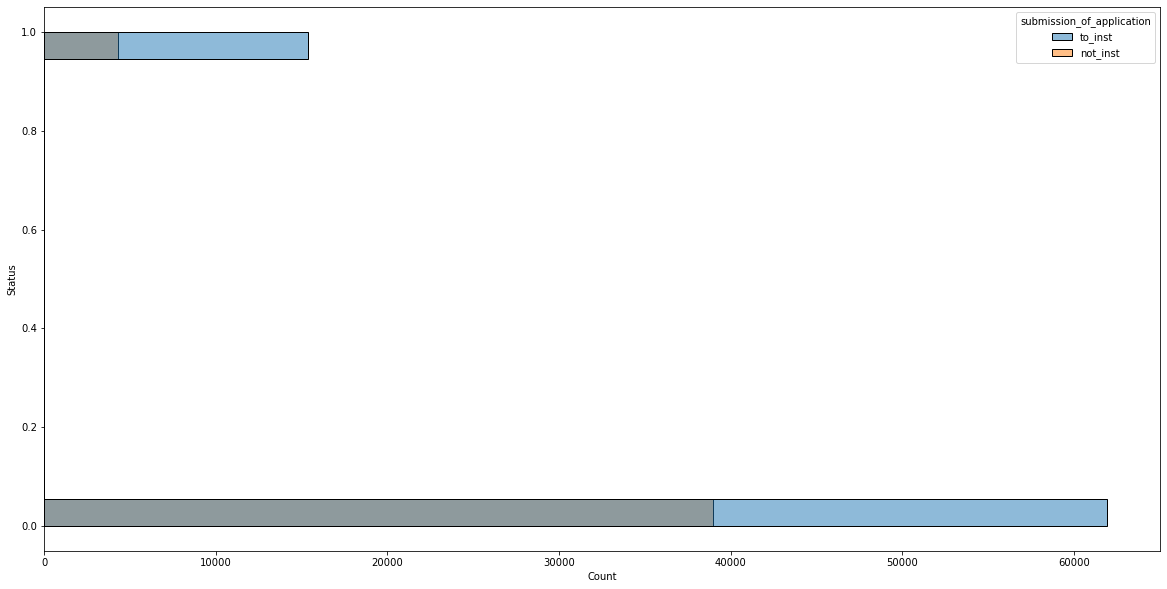

In [13]:
f,ax=plt.subplots(figsize=(20,10))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='submission_of_application')

<AxesSubplot:xlabel='Status', ylabel='submission_of_application'>

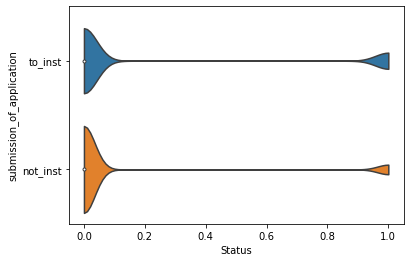

In [14]:
sns.violinplot(y='submission_of_application',x='Status',data=clean,cut=0)

Status  lump_sum_payment
0       not_lpsm            0.993091
        lpsm                0.006909
1       not_lpsm            0.930371
        lpsm                0.069629
Name: lump_sum_payment, dtype: float64

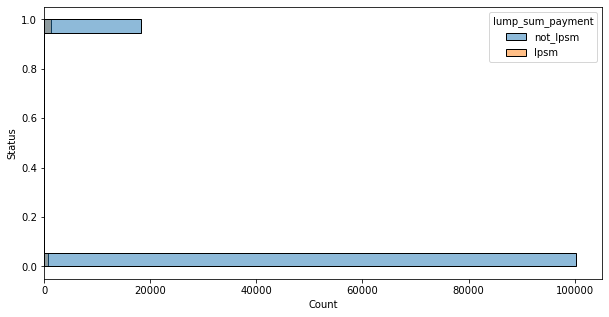

In [39]:
f,ax=plt.subplots(figsize=(10,5))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='lump_sum_payment')
# include in baseline model
clean.groupby(by='Status')['lump_sum_payment'].value_counts(normalize=True)

<AxesSubplot:xlabel='Status', ylabel='lump_sum_payment'>

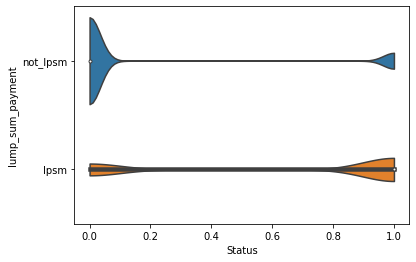

In [16]:
sns.violinplot(y='lump_sum_payment',x='Status',data=clean,cut=0)

<AxesSubplot:xlabel='Count', ylabel='Status'>

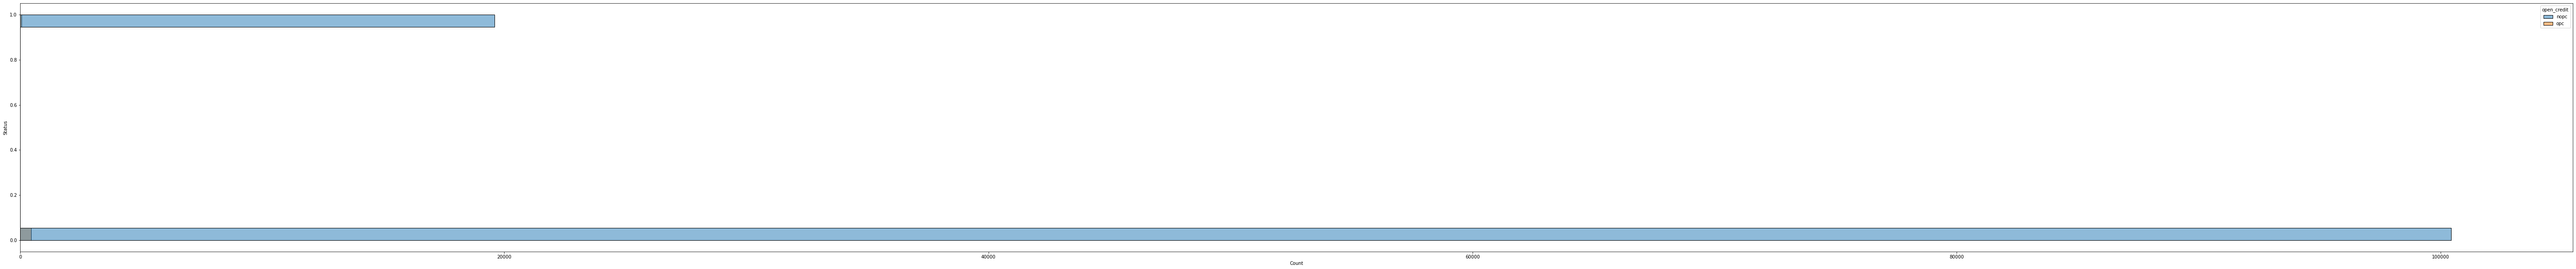

In [17]:
f,ax=plt.subplots(figsize=(100,10))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='open_credit')

<AxesSubplot:xlabel='Status', ylabel='total_units'>

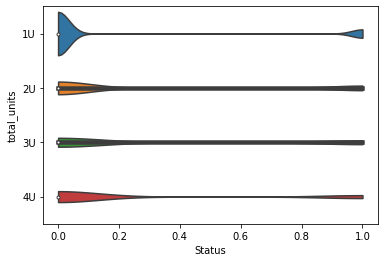

In [18]:
sns.violinplot(y='total_units',x='Status',data=clean,cut=0)

Status  business_or_commercial
0       nob/c                     0.898413
        b/c                       0.101587
1       nob/c                     0.793098
        b/c                       0.206902
Name: business_or_commercial, dtype: float64

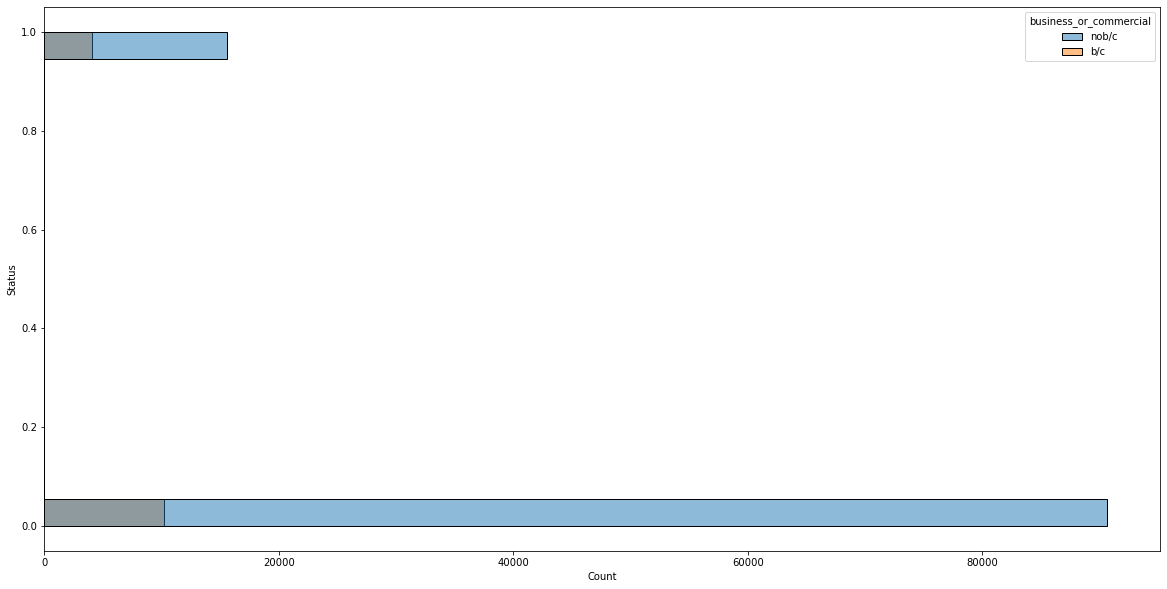

In [40]:
f,ax=plt.subplots(figsize=(20,10))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='business_or_commercial')
clean.groupby(by='Status')['business_or_commercial'].value_counts(normalize=True)

<AxesSubplot:xlabel='Status', ylabel='business_or_commercial'>

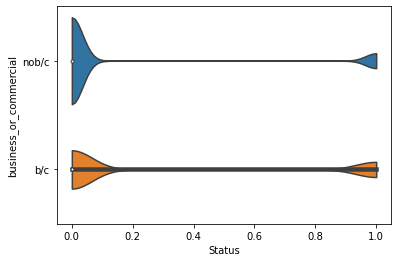

In [20]:
sns.violinplot(y='business_or_commercial',x='Status',data=clean,cut=0)
# include in baseline model

<AxesSubplot:xlabel='Count', ylabel='Status'>

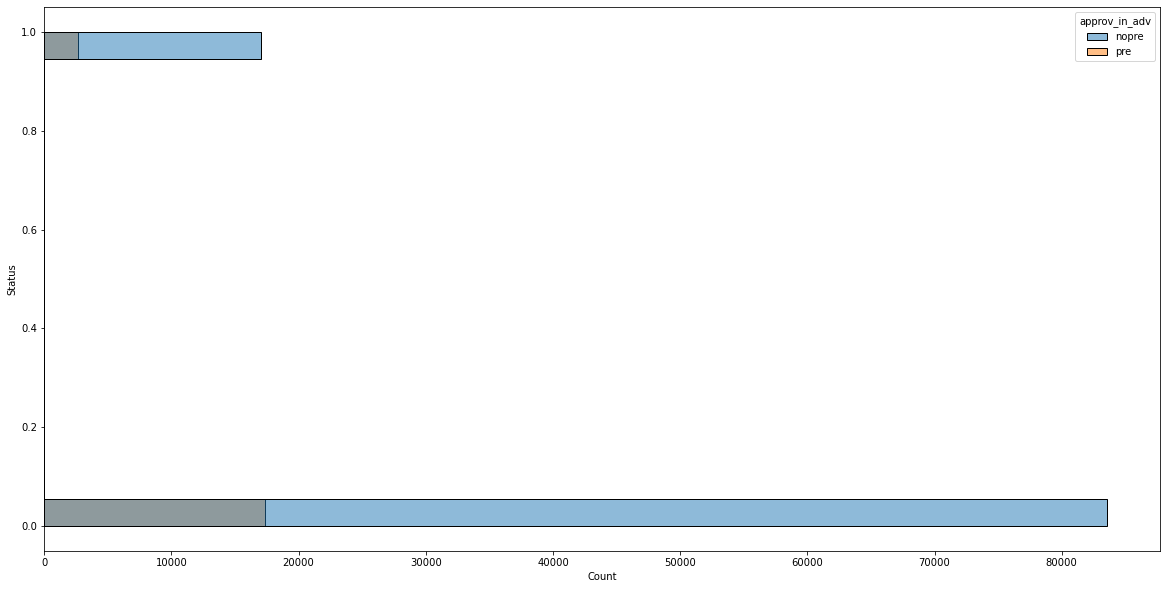

In [21]:
f,ax=plt.subplots(figsize=(20,10))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='approv_in_adv')

<AxesSubplot:xlabel='Status', ylabel='approv_in_adv'>

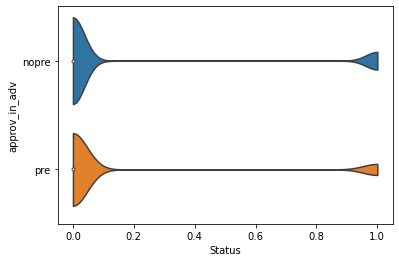

In [22]:
sns.violinplot(y='approv_in_adv',x='Status',data=clean,cut=0)

<AxesSubplot:xlabel='Status', ylabel='loan_type'>

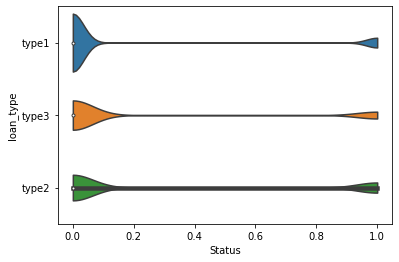

In [23]:
sns.violinplot(y='loan_type',x='Status',data=clean,cut=0)

<AxesSubplot:xlabel='Status', ylabel='loan_purpose'>

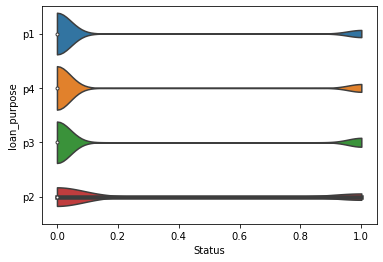

In [25]:
sns.violinplot(y='loan_purpose',x='Status',data=clean,cut=0)

<AxesSubplot:xlabel='Count', ylabel='Status'>

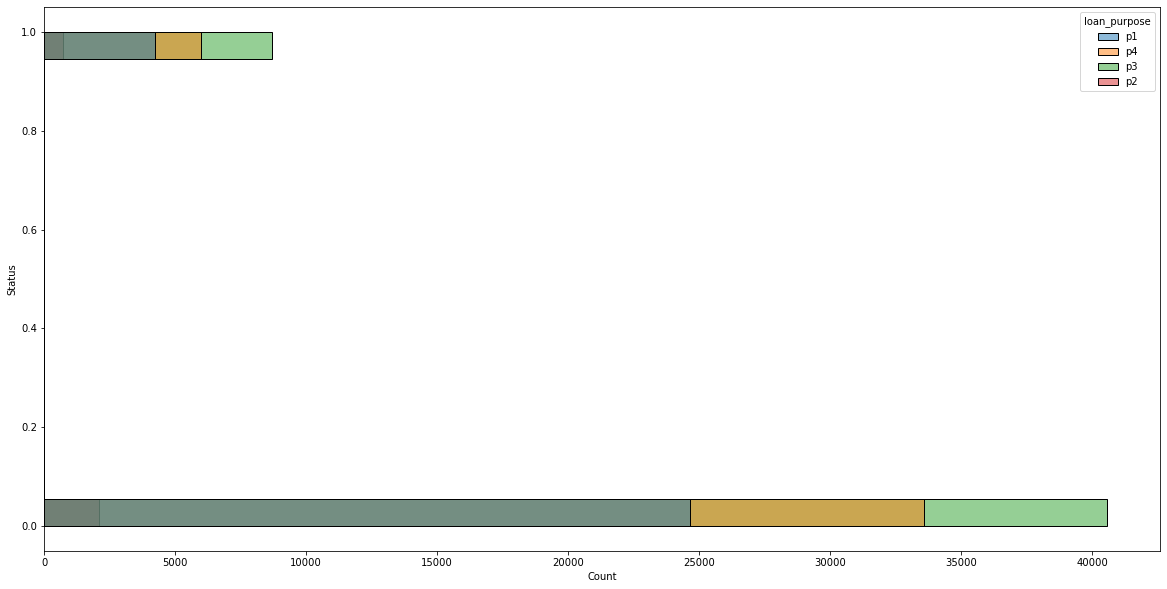

In [26]:
f,ax=plt.subplots(figsize=(20,10))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='loan_purpose')

<AxesSubplot:xlabel='Status', ylabel='Credit_Worthiness'>

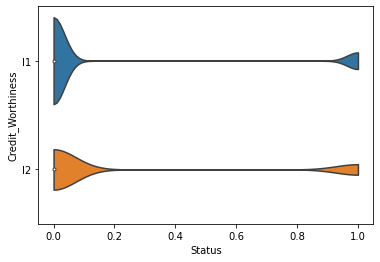

In [27]:
sns.violinplot(y='Credit_Worthiness',x='Status',data=clean,cut=0)

<AxesSubplot:xlabel='Count', ylabel='Status'>

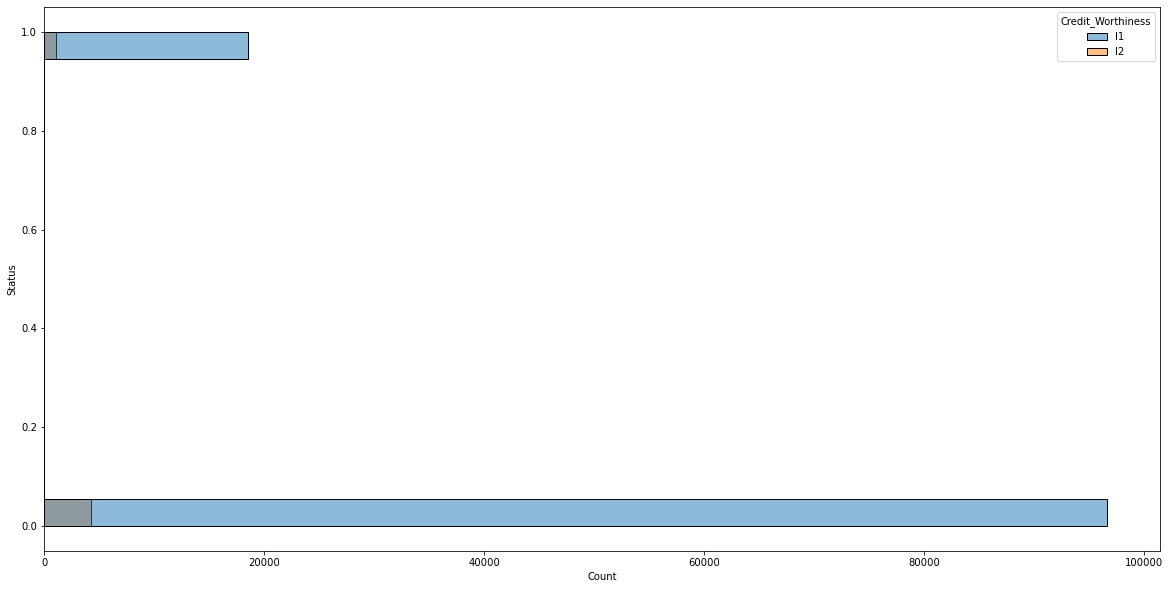

In [28]:
f,ax=plt.subplots(figsize=(20,10))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='Credit_Worthiness')

<AxesSubplot:xlabel='Status', ylabel='loan_limit'>

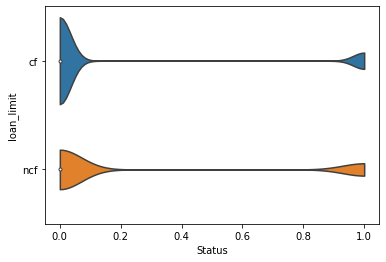

In [29]:
sns.violinplot(y='loan_limit',x='Status',data=clean,cut=0)

<AxesSubplot:xlabel='Count', ylabel='Status'>

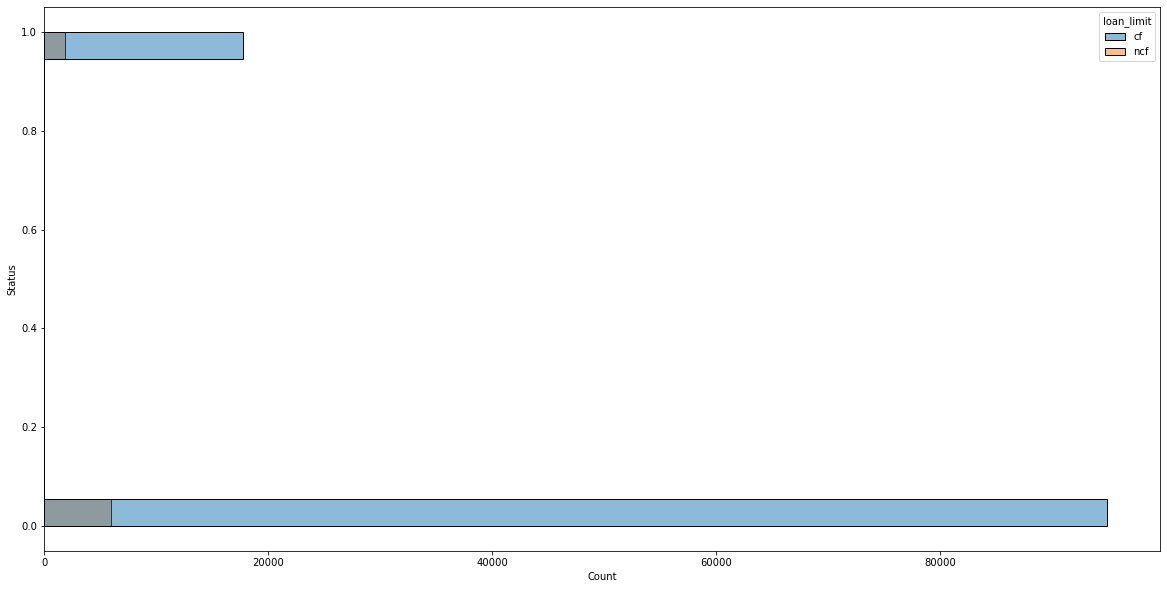

In [30]:
f,ax=plt.subplots(figsize=(20,10))
sns.histplot(ax=ax,y = 'Status',data = clean,hue='loan_limit')